# Homework 2-3 Part (b)
Prepared with Ceren Demirkol, Okan Güven, Sevgican Varol

In [202]:
require(data.table)
set.seed(123)

In [205]:
#Getting data
consumption=fread("C:/Users/ceren.orhan/Desktop/ETM 58D/HW2-3/GercekZamanliTuketim-01012016-19052020.csv")

setnames(consumption,names(consumption)[3],'value')
consumption[,date:=as.Date(Tarih,'%d.%m.%Y')]
consumption[,hour:=as.numeric(substr(Saat,1,2))]
consumption=consumption[,list(date,hour,value)]
consumption[,value:=gsub(".", "",value, fixed = TRUE)]
consumption[,value:=as.numeric(gsub(",", ".",value, fixed = TRUE))]

consumption[,lag_168:=shift(value,168)]
consumption[,lag_48:=shift(value,48)]

full_consumption=consumption[complete.cases(consumption)]
head(full_consumption)

date,hour,value,lag_168,lag_48
2016-01-08,0,28602.02,26277.24,29189.27
2016-01-08,1,27112.37,24991.82,27614.02
2016-01-08,2,25975.34,23532.61,26578.97
2016-01-08,3,25315.55,22464.78,25719.19
2016-01-08,4,25128.15,22002.91,25864.63
2016-01-08,5,25356.22,21957.08,25918.59


In [206]:
# Filter consumption data in long format
long_tr = full_consumption[date < '2020-03-01']
long_te = full_consumption[date >= '2020-03-01']

In [207]:
# Fit a linear regression model and make a prediction
long_fit = lm(value~lag_48+lag_168, long_tr)
long_pred = predict(long_fit, long_te)
summary(long_fit)


Call:
lm(formula = value ~ lag_48 + lag_168, data = long_tr)

Residuals:
     Min       1Q   Median       3Q      Max 
-16854.6   -977.3     -7.7    994.7  16055.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.633e+03  9.207e+01   17.74   <2e-16 ***
lag_48      3.111e-01  3.345e-03   92.99   <2e-16 ***
lag_168     6.394e-01  3.341e-03  191.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2371 on 36309 degrees of freedom
Multiple R-squared:  0.7676,	Adjusted R-squared:  0.7676 
F-statistic: 5.996e+04 on 2 and 36309 DF,  p-value: < 2.2e-16


In [208]:
# Create long format table & calculate APE and MAPE for lag_48 and lag_168
long_predicted = long_te[, predicted_consumption := long_pred]
long_predicted = long_predicted[, APE_LR:=(abs(long_predicted$value-long_predicted$predicted_consumption)/abs(long_predicted$value))*100]
MAPE_LR = mean(long_predicted$APE_LR)


In [209]:
# Fit a linear regression model and make a prediction
long_fit = lm(value~lag_48+lag_168, long_tr)
long_pred = predict(long_fit, long_te)
summary(long_fit)


Call:
lm(formula = value ~ lag_48 + lag_168, data = long_tr)

Residuals:
     Min       1Q   Median       3Q      Max 
-16854.6   -977.3     -7.7    994.7  16055.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.633e+03  9.207e+01   17.74   <2e-16 ***
lag_48      3.111e-01  3.345e-03   92.99   <2e-16 ***
lag_168     6.394e-01  3.341e-03  191.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2371 on 36309 degrees of freedom
Multiple R-squared:  0.7676,	Adjusted R-squared:  0.7676 
F-statistic: 5.996e+04 on 2 and 36309 DF,  p-value: < 2.2e-16


In [210]:
# Create long format table & calculate APE and MAPE for lag_48 and lag_168
long_predicted = long_te[, predicted_consumption := long_pred]
long_predicted = long_predicted[, APE_LR:=(abs(long_predicted$value-long_predicted$predicted_consumption)/abs(long_predicted$value))*100]
MAPE_LR = mean(long_predicted$APE_LR)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.01148  1.83166  4.03732  5.69813  7.61776 41.19968 

,quantile_lag_168,quantile_lag_48,quantile_lin_reg
10%,0.7727876,0.7104752,0.7542483
25%,2.0133265,1.8206243,1.8316559
50%,4.5708979,6.1576726,4.0373182
75%,8.4988936,12.7994874,7.6177555
90%,12.6391592,24.9016425,12.5462119


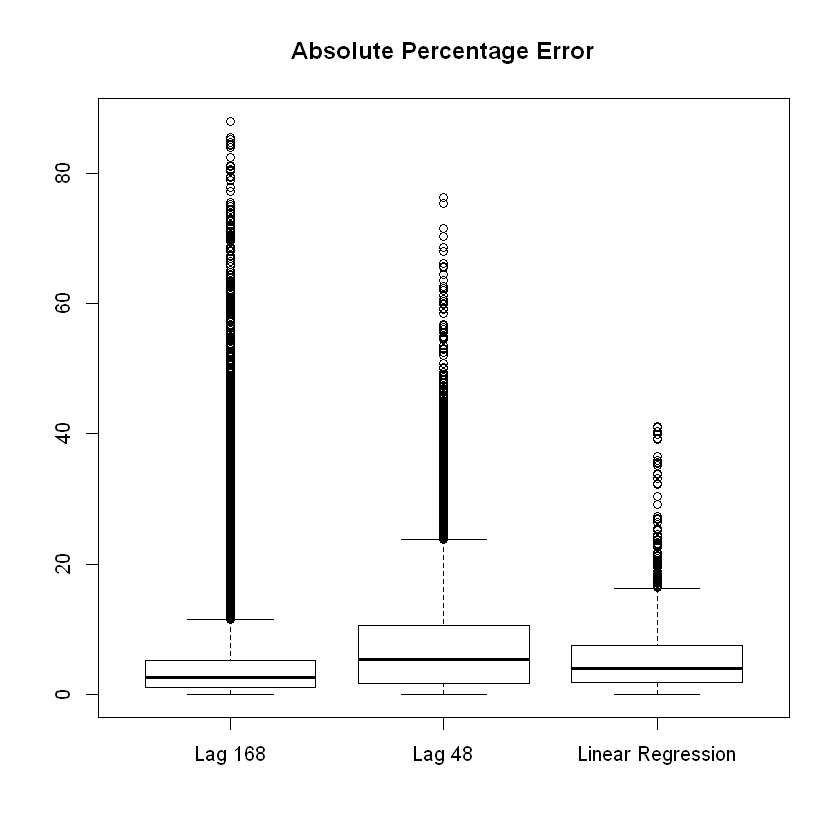

In [211]:
full_consumption[,ape_168:=abs(full_consumption$value-full_consumption$lag_168)/full_consumption$value*100] #absolute percentage error
full_consumption[,ape_48:=abs(full_consumption$value-full_consumption$lag_48)/full_consumption$value*100]

boxplot(full_consumption$ape_168,full_consumption$ape_48,long_predicted$APE_LR,names=c("Lag 168","Lag 48","Linear Regression"))
title("Absolute Percentage Error")

summary(long_predicted$APE_LR)

quantile_lag_168=quantile(compare$ape_168, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_lag_48=quantile(compare$ape_48, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
quantile_lin_reg=quantile(long_predicted$APE_LR, probs = c(0.1, 0.25, 0.5, 0.75, 0.9))
q_all=cbind(quantile_lag_168,quantile_lag_48,quantile_lin_reg)
q_all

# Comments
Comparing the boxplot of the linear regression model with lag forecasting, we see that the regression boxplot is more similar to the lag_168 forecast.

The main difference is that the second half of the interquartile range (Q3-Q2) is wider (has little more variance) and has slightly more outliers.

We can conclude that the consumption of previous week's same time is pretty much as good as using linear regression with 48 and 168 hour lags.
